The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [140]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# showing the first rows in data
df = pd.read_csv('data/nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [141]:
#the most commonly awarded gender
gender_group = df.sex.value_counts()
top_gender = gender_group[gender_group == gender_group.max()].index[0]
top_gender

'Male'

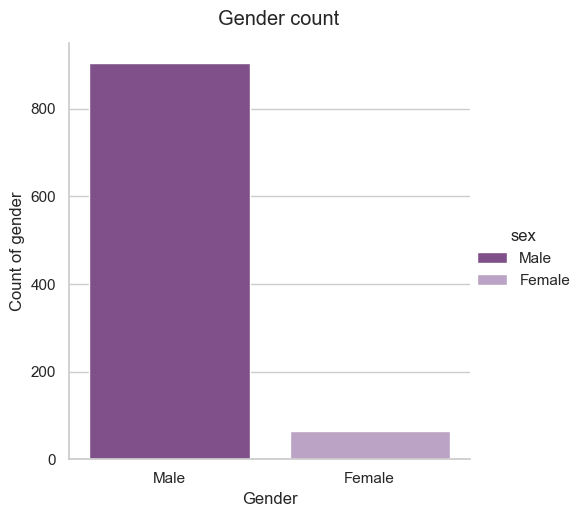

In [142]:
#Plotting the most commonly awarded gender
sns.set_palette('PRGn')
sns.set_style('whitegrid')
sns.set_context('notebook')
g = sns.catplot(x='sex', data=df, kind='count', hue='sex')
g.fig.suptitle('Gender count', y=1.03)
g.set(xlabel='Gender', ylabel='Count of gender')
plt.show()

In [143]:
# The most commonly awarded birth country
country_group = df.birth_country.value_counts()
top_country = country_group[country_group == country_group.max()].index[0]
top_country

'United States of America'

In [144]:
# The decade that had the highest proportion of US-born winners
df['decade'] = (np.floor(df['year']/10)) *10
US_born = df.query('birth_country == "United States of America"')
us_decade_nobel = US_born.groupby('decade').birth_country.count()
max_decade_usa = us_year_nobel[us_year_nobel == us_year_nobel.max()].index[0]
max_decade_usa

2000.0

In [145]:
# The decade and the category pair that had the highest proportion of female laureates
df['female'] = df['sex'] == 'Female'
decade_cat_female = df.groupby(['decade', 'category']).female.mean()
max_female = decade_cat_female[decade_cat_female == decade_cat_female.max()]
max_female_dict = {max_female.index[0][0]: max_female.index[0][1]}
max_female_dict

{2020.0: 'Literature'}

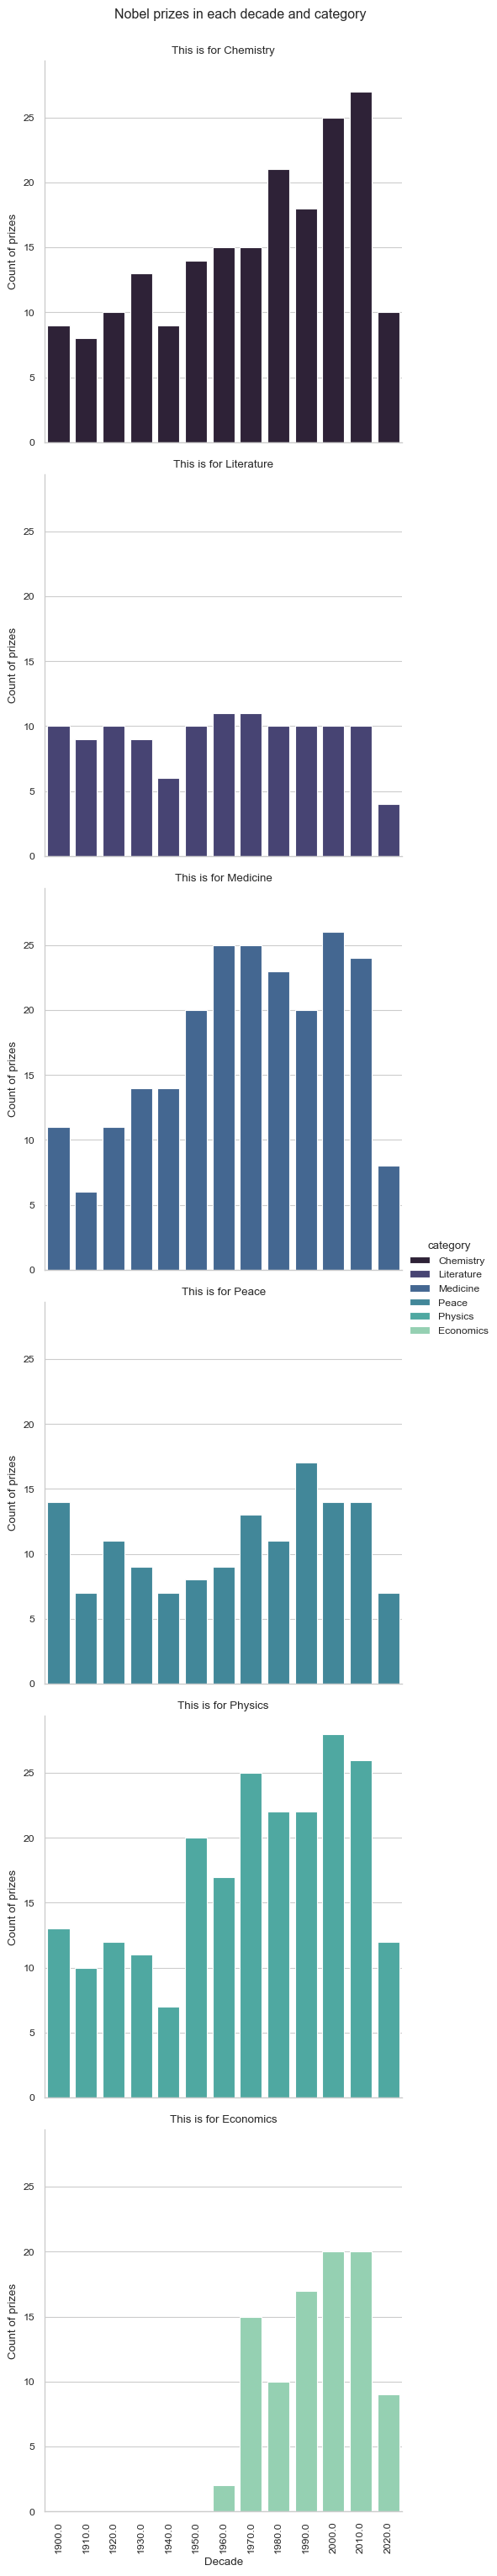

In [146]:
sns.set_context('paper')
sns.set_palette("mako")
g = sns.catplot(x='decade', data=df, kind='count', hue='category', row='category')
plt.xticks(rotation=90)
g.set(xlabel='Decade', ylabel='Count of prizes')
g.fig.suptitle('Nobel prizes in each decade and category', y=1.01)
g.set_titles('This is for {row_name}')
plt.show()

In [147]:
# the first woman who received a Nobel Prize
female_nobal = df[df['sex'] == 'Female']
first_woman_df = female_nobal[female_nobal['year'] == female_nobal.year.min()]

# the name of first woman who received a Nobel Prize
first_woman_name = first_woman_df.full_name.values[0]

# the category of first woman who received a Nobel Prize
first_woman_category = first_woman_df.category.values[0]

first_woman_name, first_woman_category

('Marie Curie, née Sklodowska', 'Physics')

In [148]:
# The repeat winners
name_count = df.full_name.value_counts()
name_repeat = name_count[name_count > 1].index
repeat_list = list(name_repeat)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

In [149]:
# count of Egyptian's nobal prize untill 2023 
Egypt_count = df[df['birth_country'] == 'Egypt'].birth_country.count()
Egyptian = df[df['birth_country'] == 'Egypt']
Egyptian

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female
353,1964,Chemistry,The Nobel Prize in Chemistry 1964,"""for her determinations by X-ray techniques of...",1/1,230,Individual,Dorothy Crowfoot Hodgkin,1910-05-12,Cairo,Egypt,Female,"University of Oxford, Royal Society",Oxford,United Kingdom,1994-07-29,Shipston-on-Stour,United Kingdom,1960.0,True
489,1978,Peace,The Nobel Peace Prize 1978,NaN,1/2,538,Individual,Mohamed Anwar al-Sadat,1918-12-25,Mit Abu al-Kawm,Egypt,Male,NaN,NaN,NaN,1981-10-06,Cairo,Egypt,1970.0,False
584,1988,Literature,The Nobel Prize in Literature 1988,"""who, through works rich in nuance - now clear...",1/1,665,Individual,Naguib Mahfouz,1911-12-11,Cairo,Egypt,Male,NaN,NaN,NaN,2006-08-30,Cairo,Egypt,1980.0,False
645,1994,Peace,The Nobel Peace Prize 1994,"""for their efforts to create peace in the Midd...",1/3,557,Individual,Yasser Arafat,1929-08-24,Cairo,Egypt,Male,NaN,NaN,NaN,2004-11-11,NaN,NaN,1990.0,False
699,1999,Chemistry,The Nobel Prize in Chemistry 1999,"""for his studies of the transition states of c...",1/1,292,Individual,Ahmed H. Zewail,1946-02-26,Damanhur,Egypt,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,2016-08-02,NaN,NaN,1990.0,False
779,2005,Peace,The Nobel Peace Prize 2005,"""for their efforts to prevent nuclear energy f...",1/2,798,Individual,Mohamed ElBaradei,1942-06-17,Cairo,Egypt,Male,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,False
